<a href="https://colab.research.google.com/github/miguelalba1997/MachineLearing-NeuralNetworks-/blob/master/NumberGuesser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
784
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


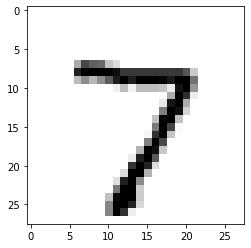

Epoch: 0 Loss for Epoch 1788206.6568908691
Epoch: 1 Loss for Epoch 415165.47537612915
Epoch: 2 Loss for Epoch 224169.77331018448
Epoch: 3 Loss for Epoch 131491.24304652214
Epoch: 4 Loss for Epoch 80581.29843813181
Epoch: 5 Loss for Epoch 54196.72907906771
Epoch: 6 Loss for Epoch 33276.235056102276
Epoch: 7 Loss for Epoch 25098.973801667304
Accuracy: 0.9453
Guess: Tensor("Equal_5:0", shape=(1,), dtype=bool)


In [6]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

#set up the amount of nodes in each layer
n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500
n_nodes_ol = 10

batch_size = 100 #how many images will go through the network at a time before 
                 #any updates are made to the network wieghts and biases
"""                
set up the height of our data. this just makes sure that the data we feed into
our network is in the right format. input validation in a way
"""
x = tf.placeholder("float", [None, 784]) #data
y = tf.placeholder("float") #label of our data

def neural_network(data):
    #initialize our hidden and output layers with random wieghts and biases
    hidden_layer1 = {"wieghts":tf.Variable(tf.random_normal([784, n_nodes_hl1])),
                     "biases":tf.Variable(tf.random_normal([n_nodes_hl1]))}

    hidden_layer2 = {"wieghts":tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                     "biases":tf.Variable(tf.random_normal([n_nodes_hl2]))}

    hidden_layer3 = {"wieghts":tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                     "biases":tf.Variable(tf.random_normal([n_nodes_hl3]))}

    output_layer =  {"wieghts":tf.Variable(tf.random_normal([n_nodes_hl3, n_nodes_ol])),
                     "biases":tf.Variable(tf.random_normal([n_nodes_ol]))}

    #relu == activation function. rectified linear
    layer1 = tf.add(tf.matmul(data, hidden_layer1["wieghts"]), hidden_layer1["biases"])
    layer1 = tf.nn.relu(layer1)

    layer2 = tf.add(tf.matmul(layer1, hidden_layer2["wieghts"]), hidden_layer2["biases"])
    layer2 = tf.nn.relu(layer2)

    layer3 = tf.add(tf.matmul(layer2, hidden_layer3["wieghts"]), hidden_layer3["biases"])
    layer3 = tf.nn.relu(layer3)

    output = tf.add(tf.matmul(layer3, output_layer["wieghts"]), output_layer["biases"])
    

    return output

def training(x):
    prediction = neural_network(x)#make our network give us a prediction
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = prediction, labels = y))#initiate our cost fuction
    optimizer = tf.train.AdamOptimizer().minimize(cost)#stochastic gradient descent
    
    #set how many cycles we want to run our model for
    epochs = 8

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch in range(epochs):
            loss = 0
            for _ in range(int(mnist.train.num_examples/batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                _, c = sess.run([optimizer, cost], feed_dict = {x: epoch_x, y: epoch_y})
                loss += c
            print("Epoch:", epoch, "Loss for Epoch", loss)
            
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y,1))
        accuracy = tf.reduce_mean(tf.cast(correct, "float"))
        print("Accuracy:", accuracy.eval({x:mnist.test.images, y:mnist.test.labels}))
        test = neural_network(mnist.test.images[0].reshape(1,-1))
        print("Guess:", tf.equal(tf.argmax(test, 1), tf.argmax(mnist.test.labels[0], 1)))

print(len(mnist.test.images[0]))
print(mnist.test.labels[0])
plt.imshow(mnist.test.images[0].reshape(-1, 28), cmap = plt.cm.gray_r, interpolation="nearest")
plt.show()
training(x)
